# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Mahika Bansal

EID: mb62835

Name: Dipali Pandey

EID: dp33957

#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

For reject, following conditions should be satisfied:     
0\*P(C$_1$|x) + 4\*(1-P(C$_1$|x)) > 1     
i.e. P(C$_1$|x) < 0.75

and
    
2\*P(C$_1$|x) + 0\*(1-P(C$_1$|x)) > 1   
i.e. P(C$_1$|x) > 0.5

Thus, decision rules are as follows:
1. Reject option: 0.5 < P(C$_1$|x) < 0.75
2. C1: P(C$_1$|x) > 0.75 
3. C2: P(C$_1$|x) < 0.5

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

In [116]:
import numpy as np

data = np.load('q2_data.npy', allow_pickle=True)

X_train, y_train = data.item().get('X_train'), data.item().get('y_train')
X_test, y_test = data.item().get('X_test'), data.item().get('y_test')

## Answer:

## a)

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#training and fitting the model
model = LogisticRegression()
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#classification metrics
print("Training data: \n",classification_report(y_train, train_pred))
print("Test data: \n",classification_report(y_test, test_pred))

Training data: 
               precision    recall  f1-score   support

       False       0.71      1.00      0.83       214
        True       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Test data: 
               precision    recall  f1-score   support

       False       0.69      1.00      0.82        69
        True       0.00      0.00      0.00        31

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



C:\Users\ashis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## b)

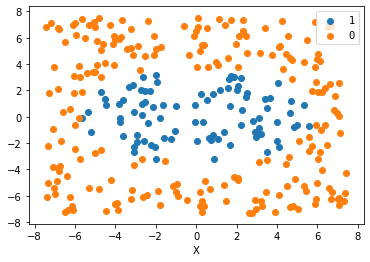

In [118]:
#plotting the classes separately
import matplotlib.pyplot as plt

plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],label = '1')
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],label = '0')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.show()

### The data cannot be separated by a linear decision boundary into distinct classes. Thus logistic regression  didn't do well and the accuracy was not that much

## c)

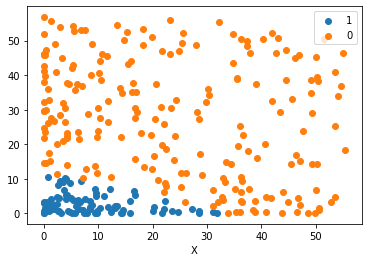

In [119]:
# Transformed the independent values to the square of themselves since the plot appear to be split between inner and outer elipses 
X_train[:,0]=X_train[:,0]**2
X_train[:,1]=X_train[:,1]**2
X_test[:,0]=X_test[:,0]**2
X_test[:,1]=X_test[:,1]**2

plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],label = '1')
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],label = '0')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.show()

In [120]:
#training and fitting the model
model = LogisticRegression()
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#classification metrics
print("Training data: \n",classification_report(y_train, train_pred))
print("Test data: \n",classification_report(y_test, test_pred))

Training data: 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       214
        True       0.99      0.99      0.99        86

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Test data: 
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        69
        True       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



### Transforming the independent variables clearly increases the performance of the model

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [2]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:
P(A,B,C,D,E,F) = P(A)P(B|A)P(D|B)P(E|B)P(C|A,E)P(F|D,E,C)

# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the entire dataset. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


## Answer:

## a)

In [135]:
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df_accuracy = pd.DataFrame(columns=['Data','Classifier','Train Accuracy','Test Accuracy'])
clf_list = []

def train_classifier(model_choice,data, X_train, X_test, y_train, y_test):
    if model_choice == 'rf':
        model = RandomForestClassifier(random_state=50)
        model_name = "Random Forest"
    elif model_choice == 'mlp':
        model_name = "Multi-layer Perceptron"
        model = MLPClassifier(random_state=50)
    elif model_choice == 'lr':
        model = LogisticRegression(random_state=50)
        model_name = "Logistic Regression"
    
    model.fit(X_train, y_train)
    y_trnpred = model.predict(X_train)
    y_tstpred = model.predict(X_test)
    trn_acc = accuracy_score(y_pred=y_trnpred, y_true=y_train)
    tst_acc = accuracy_score(y_pred=y_tstpred, y_true=y_test)
    
    df_accuracy.loc[len(df_accuracy)] = [data,model_name,trn_acc,tst_acc]
    clf_list.append((data+'_'+model_choice,model))

In [137]:
# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X_1, y_1 = load_diabetes()
X_1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [138]:
#split into test and train
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
X_train1, X_test1, y_train1, y_test1 = X_train, X_test, y_train, y_test

In [139]:
clfs =['rf','lr','mlp']
[train_classifier(clf,'Diabetes',X_train1, X_test1, y_train1, y_test1) for clf in clfs]

display(df_accuracy)

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLV

,Data,Classifier,Train Accuracy,Test Accuracy
0,Diabetes,Random Forest,1.000000,0.748031
1,Diabetes,Logistic Regression,0.780156,0.748031
2,Diabetes,Multi-layer Perceptron,0.770428,0.712598


In [141]:
# Adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df, dtype = int, drop_first=True)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X_2, y_2 = load_adult()

In [142]:
#split into test and train
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = X_train, X_test, y_train, y_test

In [143]:
[train_classifier(clf,'Census',X_train2, X_test2, y_train2, y_test2 ) for clf in clfs]

display(df_accuracy[df_accuracy['Data']=='Census'])

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.m

,Data,Classifier,Train Accuracy,Test Accuracy
3,Census,Random Forest,0.999954,0.853248
4,Census,Logistic Regression,0.794866,0.802252
5,Census,Multi-layer Perceptron,0.407518,0.407314


In [144]:
display(df_accuracy)

,Data,Classifier,Train Accuracy,Test Accuracy
0,Diabetes,Random Forest,1.000000,0.748031
1,Diabetes,Logistic Regression,0.780156,0.748031
2,Diabetes,Multi-layer Perceptron,0.770428,0.712598
3,Census,Random Forest,0.999954,0.853248
4,Census,Logistic Regression,0.794866,0.802252
5,Census,Multi-layer Perceptron,0.407518,0.407314


## b)

In [146]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve

In [147]:
# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes-2.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X, y = load_diabetes()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [126]:
#modelling and associated caliberation curve
rf = RandomForestClassifier()
rf_calibration = CalibratedClassifierCV(rf, cv = 3)
rf_calibration.fit(X,y)
y1 = rf_calibration.predict_proba(X)[::,1]
rf_x,rf_y= calibration_curve(y, y1)

mlp = MLPClassifier()
mlp_calibration = CalibratedClassifierCV(mlp, cv = 3)
mlp_calibration.fit(X,y)
y2 = mlp_calibration.predict_proba(X)[::,1]
mlp_x,mlp_y= calibration_curve(y, y2)

log = LogisticRegression()
log_calibration = CalibratedClassifierCV(log, cv = 3)
log_calibration.fit(X,y)
y3 = log_calibration.predict_proba(X)[::,1]
log_x,log_y= calibration_curve(y, y3)

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

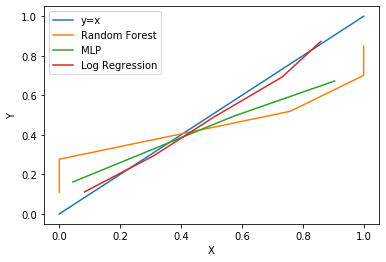

In [127]:
import matplotlib.pyplot as plt

plt.plot(y,y,label = 'y=x')
plt.plot(rf_x,rf_y,label = 'Random Forest')
plt.plot(mlp_x,mlp_y,label = 'MLP')
plt.plot(log_x,log_y,label = 'Log Regression')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [88]:
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [89]:
#modelling and associated caliberation curve
rf = RandomForestClassifier()
rf_calibration = CalibratedClassifierCV(rf, cv = 3)
rf_calibration.fit(X,y)
y1 = rf_calibration.predict_proba(X)[::,1]
rf_x,rf_y= calibration_curve(y, y1)

mlp = MLPClassifier()
mlp_calibration = CalibratedClassifierCV(mlp, cv = 3)
mlp_calibration.fit(X,y)
y2 = mlp_calibration.predict_proba(X)[::,1]
mlp_x,mlp_y= calibration_curve(y, y2)

log = LogisticRegression()
log_calibration = CalibratedClassifierCV(log, cv = 3)
log_calibration.fit(X,y)
y3 = log_calibration.predict_proba(X)[::,1]
log_x,log_y= calibration_curve(y, y3)

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

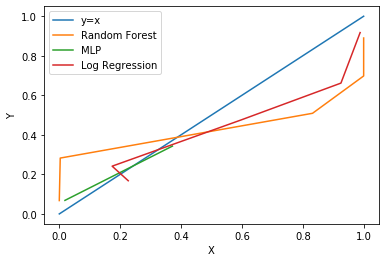

In [90]:
import matplotlib.pyplot as plt

plt.plot(y,y,label = 'y=x')
plt.plot(rf_x,rf_y,label = 'Random Forest')
plt.plot(mlp_x,mlp_y,label = 'MLP')
plt.plot(log_x,log_y,label = 'Log Regression')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## c)

In [121]:
import dice_ml
from dice_ml.utils import helpers 
from sklearn.metrics.pairwise import rbf_kernel
from scipy.stats import median_absolute_deviation as MAD

In [128]:
adults_cat_features = ['capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Male']

adults_cont_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [130]:
# Pima Diabetes dataset, for Section B only
def load_diabetes():
    df = pd.read_csv('diabetes-2.csv')
    X = df.drop(['Outcome'], axis=1)
    y = df[['Outcome']]
    return X, np.reshape(y, (-1, ))

X, y = load_diabetes()
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [131]:
#split into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.33, random_state=42)

In [132]:
# adult census dataset, for Section A and Section B
def load_adult():
    df = pd.read_csv('adult.csv')
    df = pd.get_dummies(df)
    X = df.drop(['target'], axis=1)
    y = df[['target']]
    return X, np.reshape(y, (-1, ))

X, y = load_adult()
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [133]:
#split into test and train
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

In [148]:
clf_data = {
    'Diabetes' : {
        'X_test' : X_test1,
        'y_test' : y_test1,
        'c_features' : list(X_test1.columns),
        'mad' : pd.Series(MAD(X_train1),index = X_train1.columns),
        'clfs':  {
                'Random Forest' : clf_list[0][1],
                'Logistic Regression' : clf_list[1][1],
                'MLP' : clf_list[2][1],
                }
    },
    'Census' : {
        'X_test' : X_test2,
        'y_test' : y_test2,
        'c_features' : ['age', 'fnlwgt', 'education-num'],
        'mad' : pd.Series(MAD(X_train2[['age', 'fnlwgt', 'education-num']]),index = X_train2[['age', 'fnlwgt', 'education-num']].columns),
        'clfs':  {
                'Random Forest' : clf_list[3][1],
                'Logistic Regression' : clf_list[4][1],
                'MLP' : clf_list[5][1],
                }
    }   
}

In [149]:
def generateCF(model, method, X, y, sample_size, n_cfs, mad = ''):
    
    
    data = X.copy()
    data['outcome'] = y

    d = dice_ml.Data(dataframe=data, continuous_features=list(X.columns), outcome_name='outcome')
    
    # Trained ML model to DiCE's model object
    backend = 'sklearn'
    m = dice_ml.Model(model=model, backend=backend)
    
    # initiated DiCE
    exp_random = dice_ml.Dice(d, m, method=method)
    
    query_instances = X[:sample_size]
    
    # generated counterfactuals
    dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=n_cfs, desired_class="opposite", verbose=False)
    
    mad = pd.Series(d.get_mads())
    mad = mad.replace(0,1)
    
    
    
    return dice_exp_random, data.head(sample_size), mad

cfs, data, mad = generateCF(clf_list[0][1], 'genetic', X_test1, y_test1, 15, 5)
cont_features = clf_data['Diabetes']['c_features']

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:08<00:00,  1.87it/s]


In [150]:
def Validity(cfs, data, sample_size):
   
    validity = []
    
    #Loop through each input point in sample size
    for i in range(sample_size):
        
        #Target in CF data which is not equal to the Original Target Label
        unique = sum(cfs.cf_examples_list[i].final_cfs_df['outcome'] != data.iloc[i]['outcome']) 
        
        #Number of True CFs for each data point
        validity.append(float(unique) / len(cfs.cf_examples_list[i].final_cfs_df)) 
        
    return np.mean(validity)

Validity(cfs, data, 15)

0.8533333333333334

In [151]:
def Proximity(cfs, data, sample_size, n_cfs, mad, c_features):
    
    proximity = []
   
    #Loop through each input point in sample size
    for i in range(sample_size):
        
        #Get original input
        ip = data[c_features].iloc[i]
        
        #Get Counter Factuals for this Input
        cf_i = cfs.cf_examples_list[i].final_cfs_df[c_features]
        
        #1/d_cont * Sum over p = 1 to 1/d_cont (Cp - Xp)
        distance = cf_i.apply(lambda x: abs(x - ip),axis = 1) 
        
        #Divide by Mad
        distance = distance/mad[c_features]
        
        #Get distance of each Cf from the input
        distance = distance.apply(np.mean,axis=1)
        
        #Get append mean proximity of all counter factuals for that input
        proximity.append(-distance.mean())
    
    #Return average proximity over sample
    return np.mean(proximity)

Proximity(cfs, data, 15, 5, mad, cont_features)

-1.320529710212512

In [152]:
def Sparsity(cfs, data, sample_size):
   
    total_sparsity = []
   
    #Loop through each input point in sample size
    for i in range(sample_size):
        
        #Get original input
        ip = data.iloc[i]
        
        #Get Counter Factuals for this Input
        cf_i = cfs.cf_examples_list[i].final_cfs_df
        
        sparsity_i = 1 - cf_i.apply(lambda x: (x-ip != 0).mean(),axis=1).mean()
        total_sparsity.append(sparsity_i)
        
    return np.mean(total_sparsity)

Sparsity(cfs, data, 15)

0.28

In [153]:
def Diversity(cfs, sample_size, mad, c_features):
    
    total_sum = []
    
    for i in range(sample_size):
        
        #Get CFs
        cf_i = cfs.cf_examples_list[2].final_cfs_df.reset_index(drop=True)[c_features]
        
        cf_sum = []

        for indx1, row1 in cf_i.iterrows():
            #print(indx1,row1)
            row_sum=[]
            
            for indx2, row2 in cf_i.iterrows():
                if indx1 != indx2:
                    
                    #Add row sums
                    distance = np.abs(row1 - row2)/mad[c_features]
                    
                    row_sum.append(distance.mean())
            
            #Add CF sums
            cf_sum.append(np.mean(row_sum))
        
        total_sum.append(np.mean(cf_sum))
     
    return np.mean(total_sum)

Diversity(cfs,15,mad, cont_features)

1.5217231942955964

In [154]:
def get_mmd_rbf(cfs, data, sample_size, gamma=1.0):
    
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    
    data_mean = []
    
    for i in range(sample_size):
        
        X  = data.iloc[i].values.reshape(-1, 1).T
        Y  = cfs.cf_examples_list[i].final_cfs_df.values
        
        XX = rbf_kernel(X, X, gamma)
        YY = rbf_kernel(Y, Y, gamma)
        XY = rbf_kernel(X, Y, gamma)
        
        data_mean.append(XX.mean() + YY.mean() - 2 *(XY.mean()))
    
    return np.mean(data_mean)

get_mmd_rbf(cfs, data, 15, gamma=1.0)

1.150949407862044

In [155]:
df_cfmetrics = pd.DataFrame(columns=['Dataset','Model','Method','Validaity','Proximity - Continuous', 'Diveristy - Continuous',
                      'Sparsity','Max Mean Discrepancy'])
sample_size = 15
n_cfs = 5
use_train_mad = False # Can choose to use Training Mad value or DICE returned mad values

for data_set in clf_data.keys():    
    
    for name, model in clf_data[data_set]['clfs'].items():
                
        for method in ['random', 'genetic']:
            
            print(f"{data_set}: {model} - {method}")
            
            X = clf_data[data_set]['X_test']
            y = clf_data[data_set]['y_test']
            
            if use_train_mad == True:
                mad = clf_data[data_set]['mad']
                cfs, data, mad = generateCF(model, method, X, y, sample_size, n_cfs, mad)
            else:
                cfs, data, mad = generateCF(model, method, X, y, sample_size, n_cfs)
            
            val   = Validity (cfs, data, sample_size)
            proxy = Proximity(cfs, data, sample_size, n_cfs, mad, clf_data[data_set]['c_features'])
            div   = Diversity(cfs, sample_size, mad, clf_data[data_set]['c_features'])
            spar  = Sparsity (cfs, data, sample_size)
            mmd   = get_mmd_rbf(cfs, data, sample_size, gamma=1.0)
            
            df_cfmetrics.loc[len(df_cfmetrics)]=[data_set,name,method.capitalize(),val,proxy,div,spar,mmd]

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Diabetes: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False) - random


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Diabetes: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False) - genetic


  7%|█████▌                                                                             | 1/15 [00:00<00:01,  8.76it/s]

Diabetes: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) - random


  7%|█████▌                                                                             | 1/15 [00:00<00:01,  7.52it/s]

Diabetes: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) - genetic


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Diabetes: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=50, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) - random


  7%|█████▌                                                                             | 1/15 [00:00<00:02,  5.85it/s]

Diabetes: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=50, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) - genetic


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Census: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False) - random


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Census: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False) - genetic


 13%|███████████                                                                        | 2/15 [00:03<00:19,  1.52s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 20%|████████████████▌                                                                  | 3/15 [00:04<00:18,  1.53s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 33%|███████████████████████████▋                                                       | 5/15 [00:07<00:15,  1.57s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 40%|█████████████████████████████████▏                                                 | 6/15 [00:09<00:14,  1.56s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:12<00:11,  1.60s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:14<00:09,  1.65s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:17<00:06,  1.63s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:19<00:04,  1.62s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:22<00:01,  1.64s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Census: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) - random


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Census: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) - genetic


 13%|███████████                                                                        | 2/15 [00:01<00:10,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 20%|████████████████▌                                                                  | 3/15 [00:02<00:10,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 33%|███████████████████████████▋                                                       | 5/15 [00:04<00:08,  1.18it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 40%|█████████████████████████████████▏                                                 | 6/15 [00:05<00:07,  1.16it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 53%|████████████████████████████████████████████▎                                      | 8/15 [00:06<00:05,  1.20it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:07<00:05,  1.19it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 73%|████████████████████████████████████████████████████████████▏                     | 11/15 [00:09<00:03,  1.17it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:10<00:02,  1.21it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 93%|████████████████████████████████████████████████████████████████████████████▌     | 14/15 [00:11<00:00,  1.22it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.18it/s]


Census: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=50, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) - random


  0%|                                                                                           | 0/15 [00:00<?, ?it/s]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


Census: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=50, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False) - genetic


 13%|███████████                                                                        | 2/15 [00:02<00:18,  1.39s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 20%|████████████████▌                                                                  | 3/15 [00:04<00:16,  1.38s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 33%|███████████████████████████▋                                                       | 5/15 [00:06<00:13,  1.38s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 40%|█████████████████████████████████▏                                                 | 6/15 [00:08<00:12,  1.35s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 47%|██████████████████████████████████████▋                                            | 7/15 [00:09<00:10,  1.33s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 60%|█████████████████████████████████████████████████▊                                 | 9/15 [00:12<00:07,  1.31s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:13<00:06,  1.31s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 80%|█████████████████████████████████████████████████████████████████▌                | 12/15 [00:15<00:03,  1.29s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


 87%|███████████████████████████████████████████████████████████████████████           | 13/15 [00:17<00:02,  1.30s/it]WARNING:root: MAD for feature capital-gain is 0, so replacing it with 1.0 to avoid error.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1.32s/it]


In [156]:
df_cfmetrics

,Dataset,Model,Method,Validaity,Proximity - Continuous,Diveristy - Continuous,Sparsity,Max Mean Discrepancy
0,Diabetes,Random Forest,Random,0.520000,-0.938299,0.995662,0.743704,1.194077
1,Diabetes,Random Forest,Genetic,0.826667,-1.298742,1.533867,0.293333,1.156109
2,Diabetes,Logistic Regression,Random,0.533333,-0.978800,1.363688,0.760000,1.193154
3,Diabetes,Logistic Regression,Genetic,0.866667,-1.363676,1.409007,0.265185,1.150950
4,Diabetes,MLP,Random,0.866667,-1.547997,1.022166,0.737778,1.194175
5,Diabetes,MLP,Genetic,0.866667,-1.610986,1.597339,0.217778,1.210142
6,Census,Random Forest,Random,1.000000,-0.216000,0.800000,0.958222,1.183587
7,Census,Random Forest,Genetic,0.653333,-0.763055,1.000124,0.878444,1.066932
8,Census,Logistic Regression,Random,0.800000,-0.352271,0.000000,0.962222,1.201962
9,Census,Logistic Regression,Genetic,0.666667,-1.417928,1.229988,0.871111,1.146764
